In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [15]:
df=pd.read_csv("Instagram.csv",encoding="latin1")
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Here?s how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance?#money?#business?#investing?#investme...  
1  #healthcare?#health?#covid?#data?#datascience?...  
2  #data?#datascience?#dataanalysis?#dataanalytic...  
3  #python?#pythonprogramming?#pythonprojects?#py...  
4  #datavisualization?#datascience?#data?#dataana...

In [16]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     99 non-null     int64 
 1   From Home       99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.2+ KB


C:\Users\STARLORD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


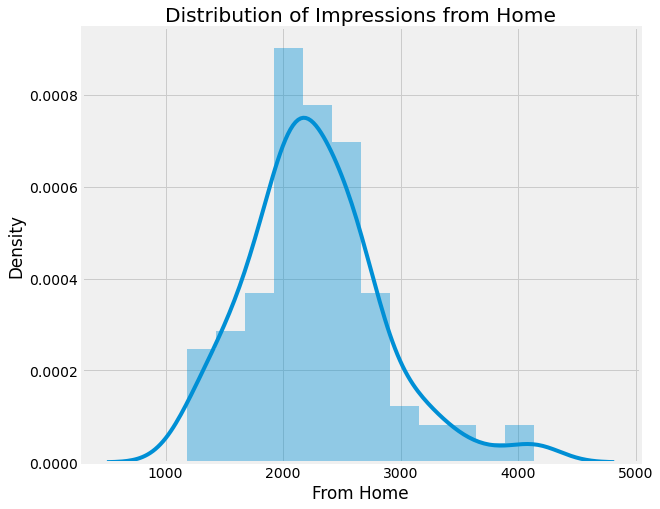

In [18]:
#Analyze Instagram Reach

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Home")
sns.distplot(df["From Home"])
plt.show()

C:\Users\STARLORD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


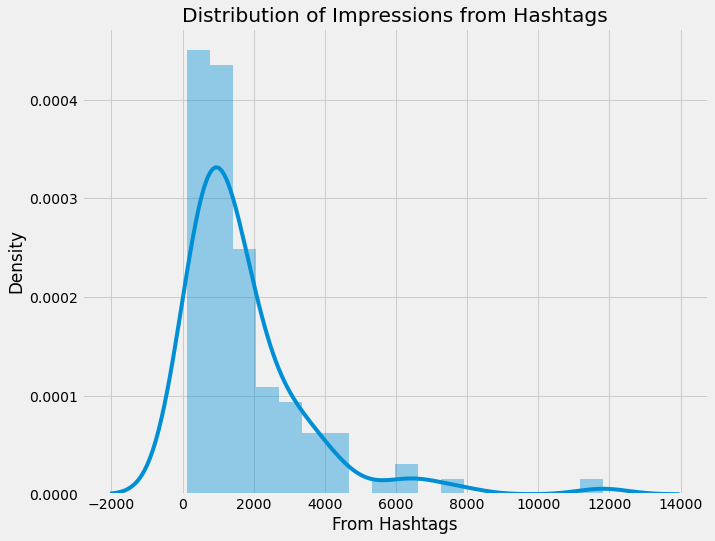

In [19]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(df["From Hashtags"])
plt.show()

C:\Users\STARLORD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


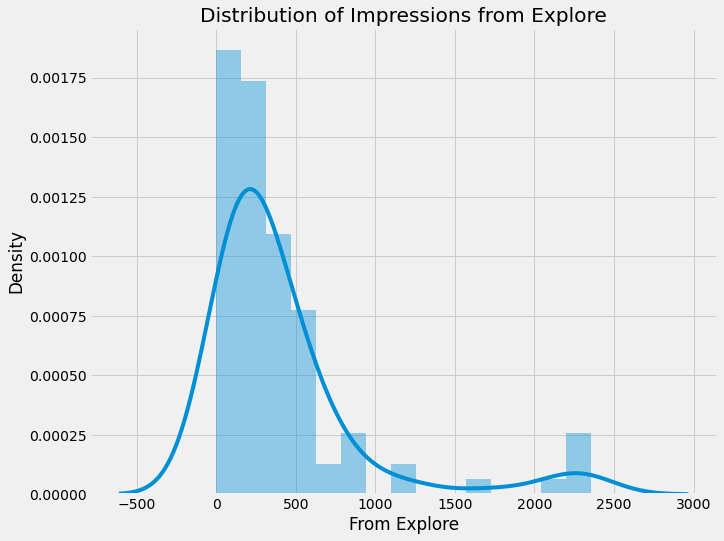

In [20]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Explore")
sns.distplot(df["From Explore"])
plt.show()

In [21]:
home=df["From Home"].sum()
hashtags=df["From Hashtags"].sum()
explore=df["From Explore"].sum()
other=df["From Other"].sum()
labels=["From Home","From Hashtags","From Explore","Other"]
values=[home,hashtags,explore,other]
fig=px.pie(df,values=values,names=labels,title="Impressions from various sources")
fig.show()

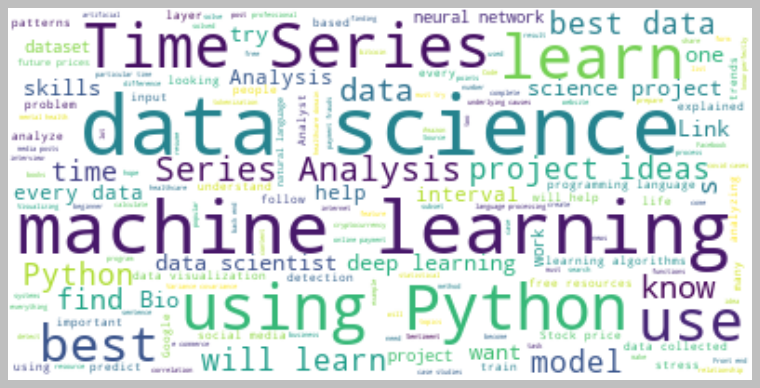

In [23]:
text=" ".join(i for i in df.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

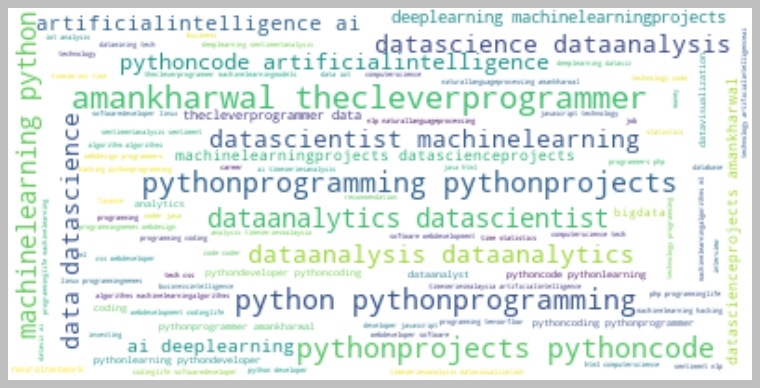

In [25]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#Finding Relationship Between Comments and Total Impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments get on a post doesn’t affect its reach.

In [27]:
#Finding Relationship Between Likes and Impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach got on Instagram.

In [29]:
#Finding Relationship Between Shares and Total Impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

In [30]:
#Finding Relationship Between Post Saves and Total Impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of Instagram post.

In [32]:
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


Analysing the Conversion Rate - In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate.

In [33]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


So the conversation rate of Instagram account is 31% which sounds like a very good conversation rate. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [34]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

# Instagram Reach Prediction Model

In [36]:
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

In [37]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7157914082404411

In [38]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12442.1164323])